In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

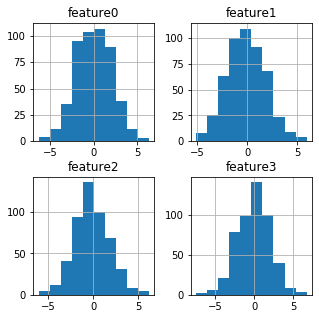

In [66]:
import pandas as pd 
import numpy as np 

np.random.seed(12)
num_col=4
dummydf = pd.DataFrame(np.random.normal(scale=2, size=(500, num_col)),
                           columns=['feature{}'.format(i) for i in range(num_col)])
# visualizeing the data
dummydf.hist(figsize=(5,5));

In [26]:
dummydf.describe()

,feature0,feature1,feature2,feature3
count,500.000000,500.000000,500.000000,500.000000
mean,0.006620,-0.080608,-0.149902,-0.057199
std,2.074443,1.918869,1.947833,2.040267
min,-6.294833,-5.079272,-6.031831,-7.421359
25%,-1.518772,-1.484648,-1.432121,-1.363717
50%,0.021040,-0.052843,-0.295099,-0.038074
75%,1.551925,1.161958,1.153648,1.248597
max,6.333114,5.957971,6.175078,6.689298


In [33]:
def Outlierbystd(col, reach=3.0, return_value=False):
    
    col_mean, col_std = col.mean(), col.std()
    cut_off = col_std * reach
    lower, upper = col_mean - cut_off, col_mean + cut_off
    if return_value:
        return lower, upper
    else:
        return [True if x < lower or x > upper else False for x in col]

In [34]:


def Outlierbyiqr(col, k=1.5, return_value=False):
    
    
    q_25, q_75 = np.percentile(col, 25), np.percentile(col, 75)
    iqr = q_75 - q_25
    cut_off = iqr * k
    lower, upper = q_25 - cut_off, q_75 + cut_off
    if return_value:
        return lower, upper
    else: 
        return [True if x < lower or x > upper else False for x in col]

In [37]:
outlier_mask = Outlierbystd(dummydf['feature0'], reach=3.0)
# first 5 elements
outlier_mask[:5]

[False, False, False, False, False]

In [40]:
dummydf['feature0'][outlier_mask]

12    -6.294833
124    6.333114
Name: feature0, dtype: float64

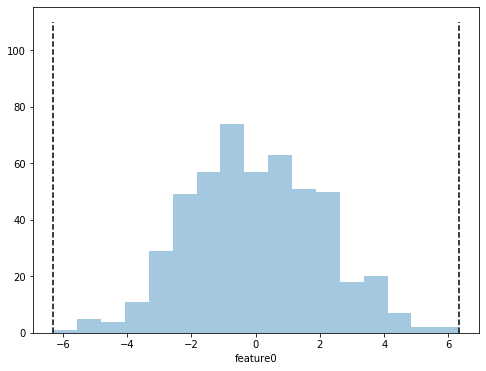

In [41]:
plt.figure(figsize=(8,6))
sns.distplot(dummydf['feature0'], kde=False);
plt.vlines(dummydf['feature0'][outlier_mask], ymin=0, ymax=110, linestyles='dashed');

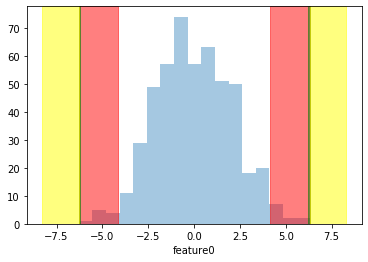

In [61]:
def plot_span(dataframe, col, reach=2.0, color='red'):
    
    lower, upper = Outlierbystd(dataframe[col], reach=reach, return_value=True)
    plt.axvspan(min(dataframe[col][dataframe[col] < lower], default=dataframe[col].min()), lower, alpha=0.5, color=color)
    plt.axvspan(upper, max(dataframe[col][dataframe[col] > upper], default=dataframe[col].max()), alpha=0.5, color=color)
    plt.plot()
column = 'feature0'
sns.distplot(dummydf[column], kde=False)
plot_span(dummydf, column, reach=2.0, color='red')
plot_span(dummydf, column, reach=3.0, color='green')
plot_span(dummydf, column, reach=4.0, color='yellow')

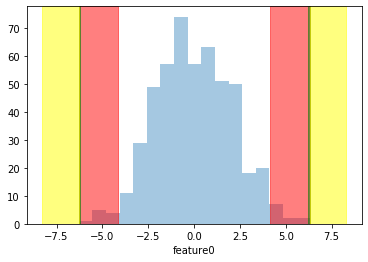

In [59]:
column = 'feature0'
sns.distplot(dummydf[column], kde=False)
plot_span(dummydf, column, nstd=2.0, color='red')
plot_span(dummydf, column, nstd=3.0, color='green')
plot_span(dummydf, column, nstd=4.0, color='yellow')

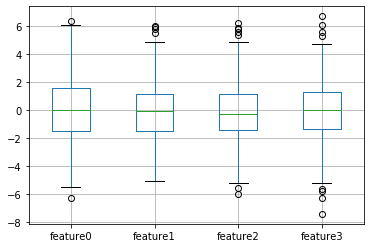

In [63]:
dummydf.boxplot();